# Fig 5: Halo Occupation Distribution (HOD)

This notebook make figure 5 of the halo model review `(Asgari,Heymans and Mead 2022)`

HODs for typical red and blue galaxies observed in a typical galaxy survey. 

In [1]:
# Standard imports
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson as Poisson

# Imports from the halo model repo
sys.path.append('../modules/')
import halomodel
import utility_functions as utility

First we define three HODs with reasonable values. hod1 corresponds to red galaxies, while hod3 is more appropriate for blue ones. We find the number of central and satellite galaxies for each case, as well as their variance with and without the central condition.

In [2]:
# Zhai et al. (2017; 1607.05383)
hod1 = {'name': 'Zhai',
        'Mmin':10**13.68,
        'sigma':0.82,
        'Msat':10**14.87,
        'alpha':0.41,
        'Mcut':10**12.32}

# Smith et al. (2017; 1701.06581) taken roughly from line in Fig. 4 r-band magnitude -20.
hod2 = {'name': 'Zheng',
        'Mmin':8e11,
        'sigma':0.05,
        'M0': 3e11,
        'M1': 1e13,
        'alpha': 1.0}

# Smith et al. (2017; 1701.06581) taken roughly from line in Fig. 4 r-band magnitude -21.
hod3 = {'name': 'Zheng',
        'Mmin':5e12,
        'sigma':0.4,
        'M0': 3e12,
        'M1': 5e13,
        'alpha': 1.1}

hods = [hod1,hod2,hod3]

# Mass range to plot
Mmin = 1e12; Mmax = 1e15
nM = 129
Ms = utility.logspace(Mmin, Mmax, nM)

Nc_list = []
Ns_list = []
Ng_list = []
Nh_list = []
Nr_list = []
vcc_list= []
vss_list= []
vrr_list= []
vhh_list= []
vgg_list= []
for ihod in range(len(hods)):
# Fill arrays of mean numbers of central and satellite galaxies at each halo mass
    if hods[ihod]['name'] == 'Zheng':
        Nc, Ns = halomodel.HOD_Zheng(Ms, 
                        Mmin=hods[ihod]["Mmin"], 
                        sigma=hods[ihod]["sigma"], 
                        M0=hods[ihod]["M0"], 
                        M1=hods[ihod]["M1"], 
                        alpha=hods[ihod]["alpha"]
                        )
        
    if hods[ihod]['name'] == 'Zhai':
        Nc, Ns = halomodel.HOD_Zhai(Ms, 
                                    Mmin=hods[ihod]["Mmin"], 
                                    sigma=hods[ihod]["sigma"], 
                                    Msat=hods[ihod]["Msat"], 
                                    alpha=hods[ihod]["alpha"], 
                                    Mcut=hods[ihod]["Mcut"]
                                   )
    Ng = Nc+Ns
    Nr = Nc*Ns
    Nh = Nr+Nc
    Nc_list.append(Nc)
    Ns_list.append(Ns)
    Ng_list.append(Ng)
    Nh_list.append(Nh)
    Nr_list.append(Nr)

    # Variances without central condition
    vcc, vss, vcs = halomodel.HOD_variance(Nc, Ns, central_condition=False)
    vgg = vcc+vss
    vcc_list.append(vcc)
    vgg_list.append(vgg)
    vss_list.append(vss)

    # Variances with central condition
    vcc, vrr, vcr = halomodel.HOD_variance(Nc, Ns, central_condition=True)
    vhh = vcc+vrr+2.*vcr
    vhh_list.append(vhh)
    vrr_list.append(vrr)


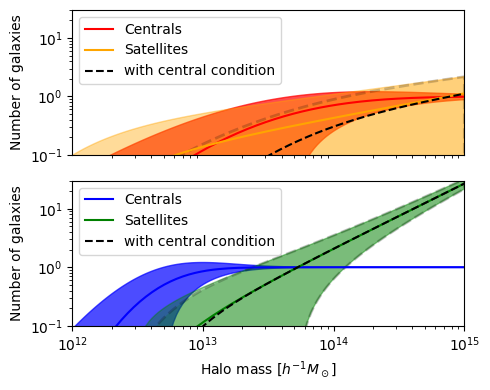

In [3]:
# Plotting Options
plot_variance = True
plot_cc = True #with central condition
plot_total = False

Nmin = 1e-1
Nmax = 3e1

red_cen_color = 'red'
red_sat_color = 'orange'
red_tot_color = 'black'
blue_cen_color = 'blue'
blue_sat_color = 'green'
blue_tot_color = 'black'

# which hods to plot?
list_hods =[1,3]
nplots = len(list_hods)
_, axs = plt.subplots(nplots, 1, dpi=100, figsize=(5, 2*nplots))

for iplot, ihod in enumerate(list_hods):
    if ihod == 1:
        cen_color = red_cen_color
        sat_color = red_sat_color
        tot_color = red_tot_color
    elif ihod == 3:
        cen_color = blue_cen_color
        sat_color = blue_sat_color
        tot_color = blue_tot_color
    else:
        cen_color = red_cen_color
        sat_color = blue_sat_color
        tot_color = 'black'
    # Plot the mean HOD
    ih=ihod-1
    plt.subplot(nplots, 1, iplot+1)
    if plot_variance:
        plt.fill_between(Ms, Nc_list[ih]+np.sqrt(vcc_list[ih]), Nc_list[ih]-np.sqrt(vcc_list[ih]), 
                         color=cen_color, alpha=0.7)
        plt.fill_between(Ms, Ns_list[ih]+np.sqrt(vss_list[ih]), Ns_list[ih]-np.sqrt(vss_list[ih]), 
                         color=sat_color, alpha=0.4)
        if plot_cc:
            plt.fill_between(Ms, Nr_list[ih]+np.sqrt(vrr_list[ih]), Ns_list[ih]-np.sqrt(vrr_list[ih]),
                             ls="--",lw=2,edgecolor='black', facecolor=sat_color, alpha=0.2)
        if plot_total:
            plt.fill_between(Ms, Ng_list[ih]+np.sqrt(vgg_list[ih]), Ng_list[ih]-np.sqrt(vgg_list[ih]), 
                             color=tot_color, alpha=0.1)
            if plot_cc:
                plt.fill_between(Ms, Nh_list[ih]+np.sqrt(vhh_list[ih]), Nh-np.sqrt(vhh_list[ih]), 
                                 color=tot_color, alpha=0.1)
    
    plt.plot(Ms, Nc_list[ih], color=cen_color, label='Centrals')
    plt.plot(Ms, Ns_list[ih], color=sat_color, label='Satellites')
    
    if plot_cc:
        plt.plot(Ms, Nr_list[ih], color='black', ls='--', label='with central condition')
    if plot_total:
        plt.plot(Ms, Ng_list[ih], label='Total', color=tot_color)
        if plot_cc:
            plt.plot(Ms, Nh_list[ih], ls='--', color=tot_color)#, label='with central condition')
    plt.xscale('log')
    if iplot == 1:
        plt.xlabel('Halo mass [$h^{-1}M_\odot$]')
    plt.xlim((Mmin, Mmax))
    plt.yscale('log')
    plt.ylabel('Number of galaxies')
    plt.ylim((Nmin, Nmax))
    plt.legend(loc='upper left')
    if iplot == 0:
        plt.xticks([])
    plt.tight_layout()
plt.tight_layout()
plt.savefig('plots/HOD.pdf',bbox_inches='tight')
plt.show()